https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import pandas as pd
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [2]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [3]:
print(df.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
print(df.isnull().sum())

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text


In [ ]:
# Apply preprocess_text function to 'review' column
df['clean_review'] = df['Review Text'].apply(preprocess_text)

# Display the preprocessed data
print(df[['Review Text', 'clean_review']].head(10))

In [7]:
import numpy as np
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
df['Review Text'] = df['Review Text'].replace(np.nan,'',regex=True) #consider this line

sentiment_scores=[]
for text in df['Review Text']:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df['Sentiment Score'] = sentiment_scores

In [10]:
def get_sentiment_label(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels


In [11]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Score,Sentiment Label
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9427,Positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,Positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,Positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.9419,Positive
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.8004,Positive
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,-0.0909,Negative
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.7175,Positive
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,-0.3724,Negative
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,0.3578,Positive
12,12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,0.5520,Positive


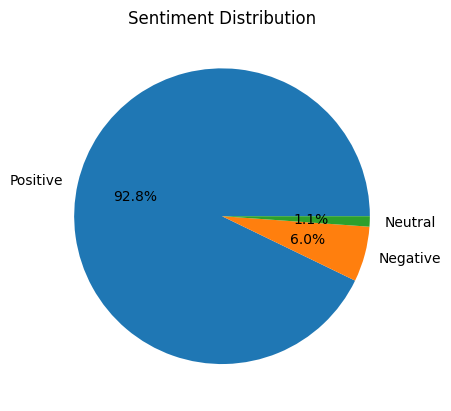

In [12]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment Label'].value_counts()

plt.pie(sentiment_counts, labels = sentiment_counts.index,autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

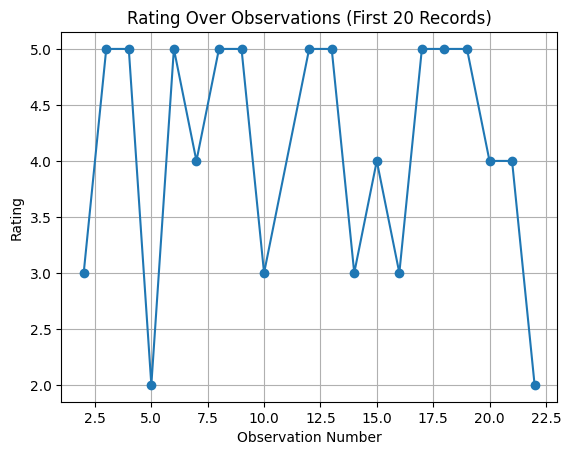

In [14]:
# Slice the DataFrame to include only the first 20 records
df_subset = df.head(20)

# Plot ratings for the first 20 records
# plt.figure(figsize=(10, 6))
plt.plot(df_subset.index, df_subset['Rating'], marker='o', linestyle='-')
plt.title('Rating Over Observations (First 20 Records)')
plt.xlabel('Observation Number')
plt.ylabel('Rating')
plt.grid(True)
plt.show()